In [ ]:
  import numpy as np
  import pandas as pd

In [ ]:
! kaggle datasets download jangedoo/utkface-new

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
 97% 321M/331M [00:06<00:00, 98.7MB/s]
100% 331M/331M [00:06<00:00, 56.3MB/s]


In [ ]:
!unzip /content/utkface-new.zip

Streaming output truncated to the last 5000 lines.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104204327

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

In [ ]:
import numpy as np
import pandas as pd

import os
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import PIL
from PIL import Image

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings("ignore")

In [ ]:
root_dir = "/content/UTKFace"

In [ ]:
path_arr = []
age_arr = []
gender_arr = []

In [ ]:
import os
print(os.path.exists('/content/UTKFace'))

True


In [ ]:
path_arr = []
age_arr = []
gender_arr = []

for file in tqdm(os.listdir(root_dir)):
    labels = file.split("_")

    filepath = os.path.join(root_dir, file)
    age = int(labels[0])
    gender = int(labels[1])

    path_arr.append(filepath)
    age_arr.append(age)
    gender_arr.append(gender)


100%|██████████| 23708/23708 [00:00<00:00, 507536.39it/s]


In [ ]:
df = pd.DataFrame({
    "image_path": path_arr,
    "age": age_arr,
    "gender": gender_arr
})

In [ ]:
df.head()

,image_path,age,gender
0,/content/UTKFace/2_0_4_20170103210125060.jpg.c...,2,0
1,/content/UTKFace/58_0_0_20170117191805986.jpg....,58,0
2,/content/UTKFace/28_1_0_20170104172639340.jpg....,28,1
3,/content/UTKFace/24_1_1_20170112234558855.jpg....,24,1
4,/content/UTKFace/36_0_0_20170117183301527.jpg....,36,0


In [ ]:
df_train, df_valid, df_test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

print("Total Size:", df.shape[0])
print("Train Size:", df_train.shape[0])
print("valid Size:", df_valid.shape[0])
print("Test Size:", df_test.shape[0])

Total Size: 23708
Train Size: 14224
valid Size: 4742
Test Size: 4742


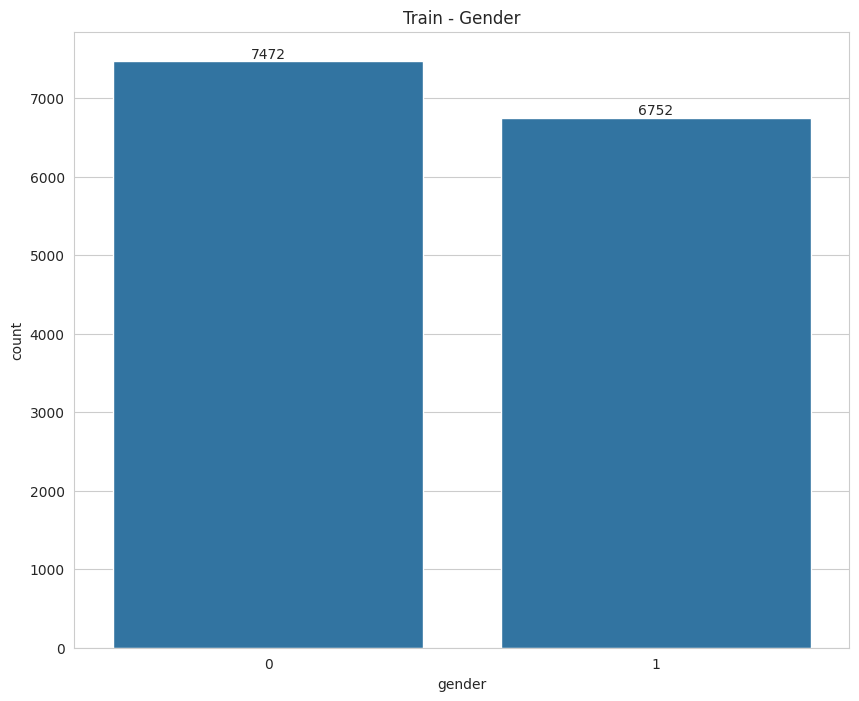

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="gender", order=df_train["gender"].value_counts().index, data=df_train)
ax.set_title("Train - Gender")
for container in ax.containers:
    ax.bar_label(container)

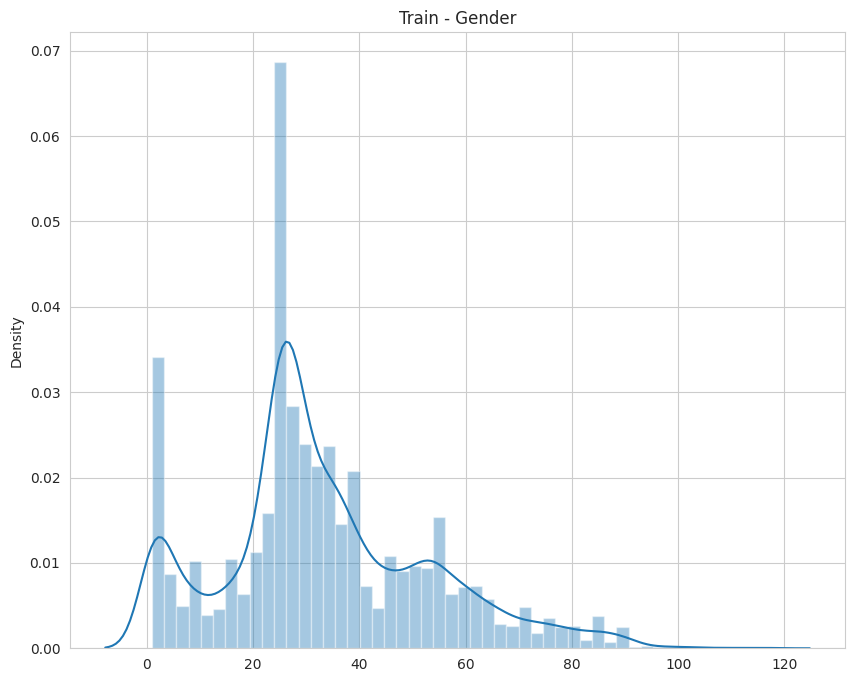

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.distplot(x=df_train["age"])
ax.set_title("Train - Gender")
plt.show()

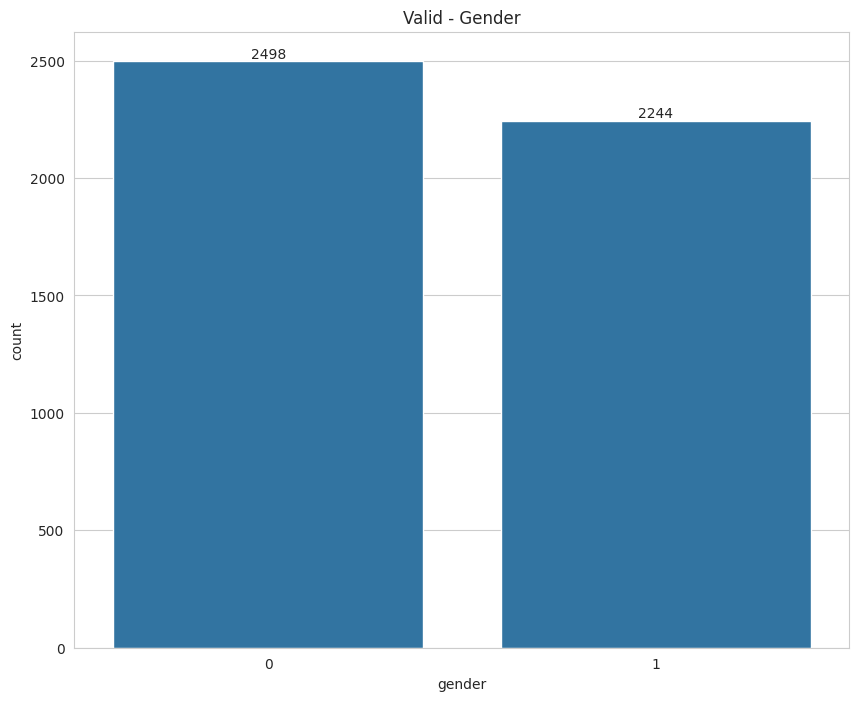

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="gender", order=df_valid["gender"].value_counts().index, data=df_valid)
ax.set_title("Valid - Gender")
for container in ax.containers:
    ax.bar_label(container)

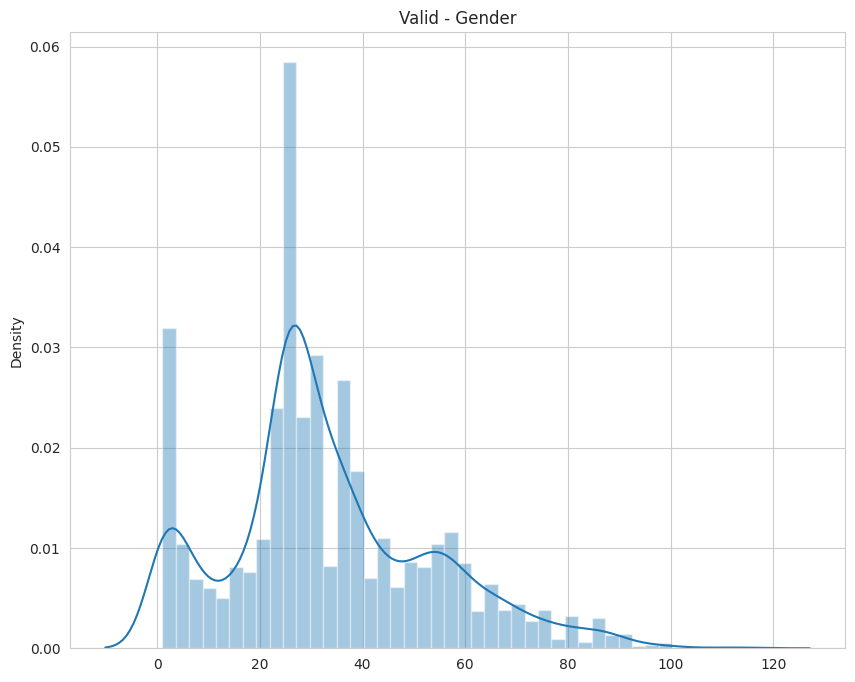

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.distplot(x=df_valid["age"])
ax.set_title("Valid - Gender")
plt.show()

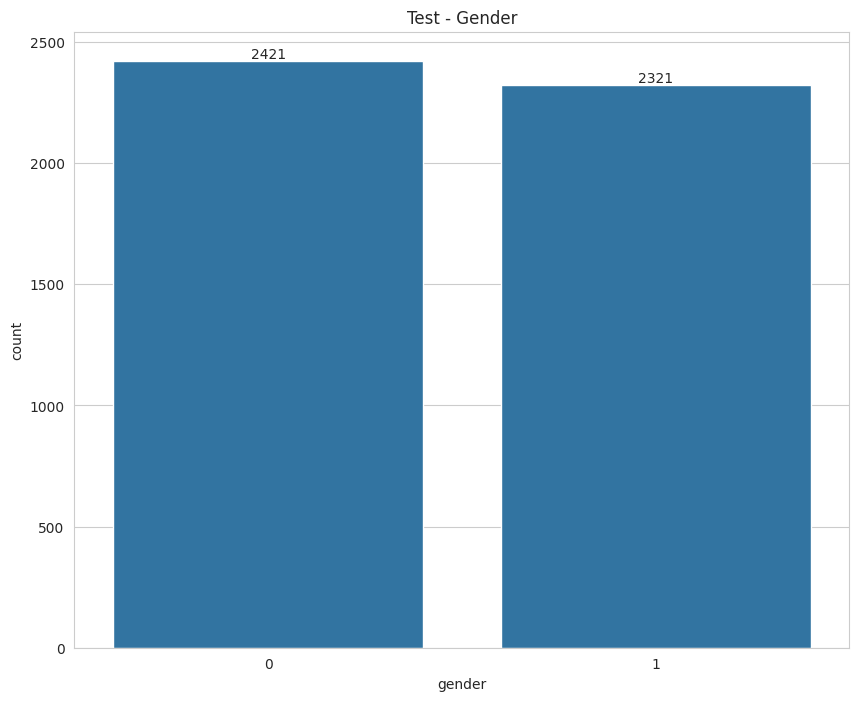

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="gender", order=df_test["gender"].value_counts().index, data=df_test)
ax.set_title("Test - Gender")
for container in ax.containers:
    ax.bar_label(container)

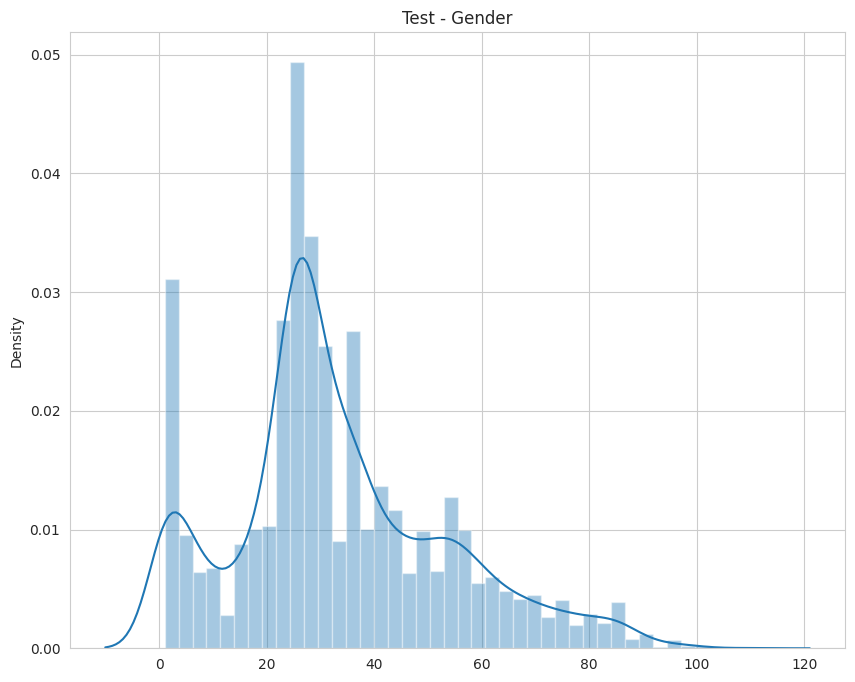

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.distplot(x=df_test["age"])
ax.set_title("Test - Gender")
plt.show()

In [ ]:
def visualize_df(df: np.ndarray):
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))

    for i, ax in enumerate(axes.ravel()):
        if i < len(df):
            a = np.random.randint(1, len(df), 1)[0]
            img_path = df.loc[a][['image_path']].values[0]
            img_age = df.loc[a][['age']].values[0]
            img_gender = df.loc[a][['gender']].values[0]

            image = Image.open(img_path).convert('RGB')

            ax.imshow(image)
            ax.set_title(f"Age: {img_age}\nGender: {img_gender}")
            ax.axis('off')

        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()


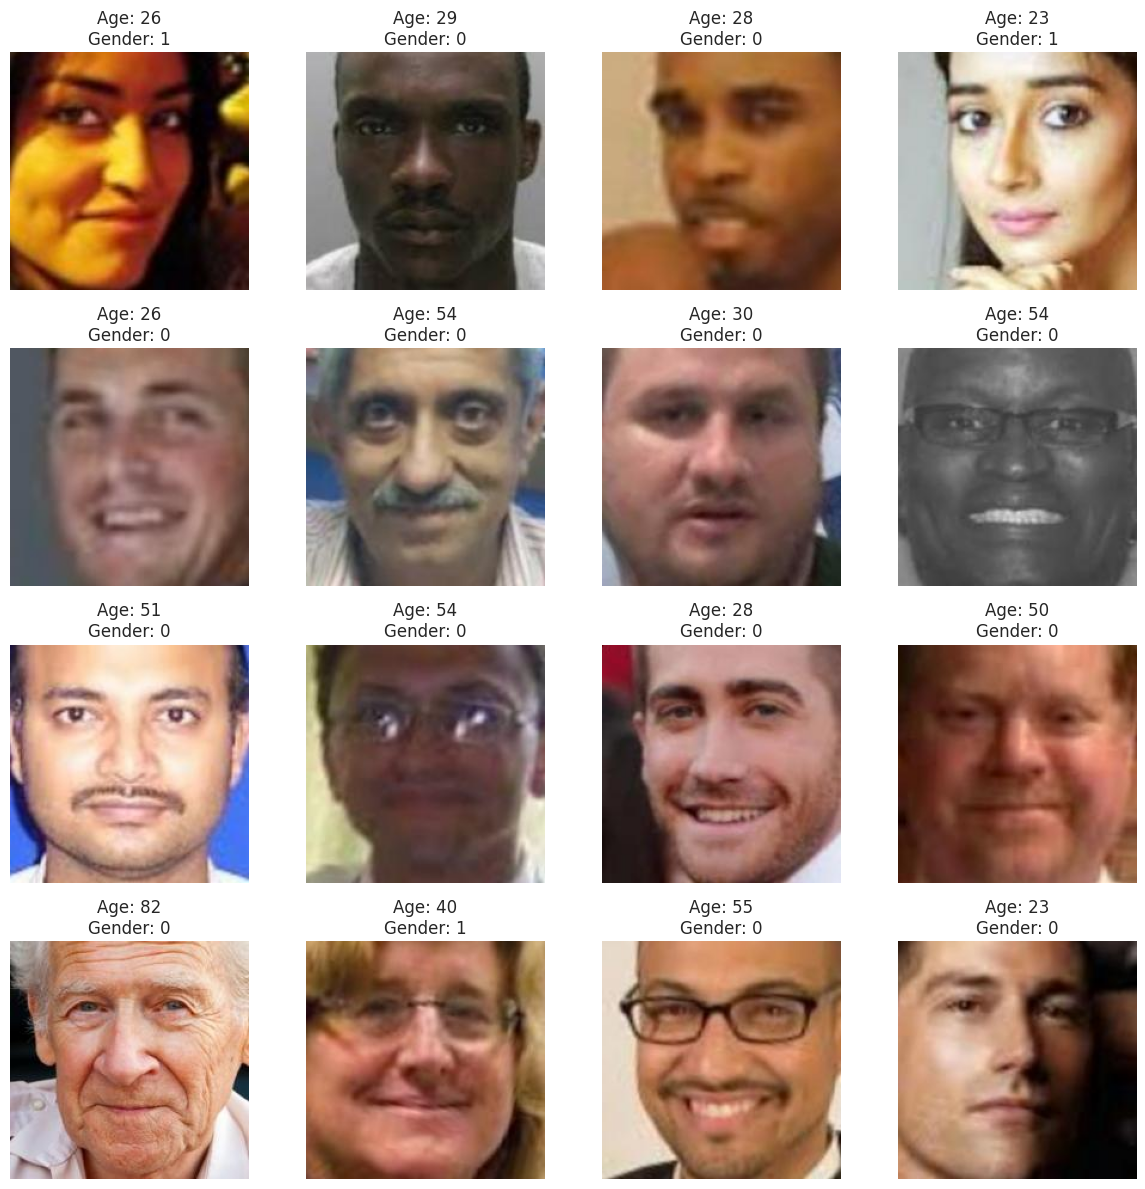

In [ ]:
visualize_df(df_train)

In [ ]:
train_img_arr = []
train_gender_arr = []
train_age_arr = []

for idx, row in tqdm(df_train.iterrows()):
    img = load_img(row['image_path'], color_mode="grayscale")
    img = img.resize((128, 128), Image.LANCZOS)
    img = np.array(img, dtype=float)
    img /= 255.0
    train_img_arr.append(img)
    train_gender_arr.append(row['gender'])
    train_age_arr.append(row['age'])

train_img_arr = np.array(train_img_arr).reshape(len(train_img_arr), 128, 128, 1)
train_gender_arr = np.array(train_gender_arr)
train_age_arr = np.array(train_age_arr)

14224it [00:16, 857.79it/s]


In [ ]:
valid_img_arr = []
valid_gender_arr = []
valid_age_arr = []

for idx, row in tqdm(df_valid.iterrows()):
    img = load_img(row['image_path'], color_mode="grayscale")
    img = img.resize((128, 128), Image.LANCZOS)
    img = np.array(img, dtype=float)
    img /= 255.0
    valid_img_arr.append(img)
    valid_gender_arr.append(row['gender'])
    valid_age_arr.append(row['age'])

valid_img_arr = np.array(valid_img_arr).reshape(len(valid_img_arr), 128, 128, 1)
valid_gender_arr = np.array(valid_gender_arr)
valid_age_arr = np.array(valid_age_arr)


4742it [00:05, 924.57it/s]


In [ ]:
test_img_arr = []
test_gender_arr = []
test_age_arr = []

for idx, row in tqdm(df_test.iterrows()):
    img = load_img(row['image_path'], color_mode="grayscale")
    img = img.resize((128, 128), Image.LANCZOS)
    img = np.array(img, dtype=float)
    img /= 255.0
    test_img_arr.append(img)
    test_gender_arr.append(row['gender'])
    test_age_arr.append(row['age'])

test_img_arr = np.array(test_img_arr).reshape(len(test_img_arr), 128, 128, 1)
test_gender_arr = np.array(test_gender_arr)
test_age_arr = np.array(test_age_arr)


4742it [00:05, 932.29it/s]


In [ ]:
inputs = Input(shape=(128, 128, 1))

conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
max1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(max1)
max2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(max2)
max3 = MaxPooling2D(pool_size=(2, 2))(conv3)

flat = Flatten()(max3)

dense1 = Dense(256, activation='relu')(flat)
drop1 = Dropout(0.3)(dense1)
output_gender = Dense(1, activation='sigmoid')(drop1)

dense2 = Dense(256, activation='relu')(flat)
drop2 = Dropout(0.3)(dense2)
output_age = Dense(1, activation='relu')(drop2)

model = Model(inputs=[inputs], outputs=[output_gender, output_age])

model.compile(loss=['binary_crossentropy', 'mae'],
              optimizer='adam',
              metrics=['accuracy','mae'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 126, 126, 32)         320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 61, 61, 64)           18496     ['max_pooling2d[0][0]']   

In [ ]:
history = model.fit(x=train_img_arr, y=[train_gender_arr, train_age_arr], batch_size=64, epochs=25, validation_data=(valid_img_arr, [valid_gender_arr, valid_age_arr]))

Epoch 1/25
223/223 [==============================] - 50s 217ms/step - loss: 15.5641 - dense_1_loss: 0.6363 - dense_3_loss: 14.9278 - dense_1_accuracy: 0.6554 - dense_1_mae: 0.4194 - dense_3_accuracy: 0.0449 - dense_3_mae: 14.9278 - val_loss: 12.0643 - val_dense_1_loss: 0.4836 - val_dense_3_loss: 11.5807 - val_dense_1_accuracy: 0.7765 - val_dense_1_mae: 0.3400 - val_dense_3_accuracy: 0.0500 - val_dense_3_mae: 11.5807
Epoch 2/25
223/223 [==============================] - 48s 213ms/step - loss: 11.6864 - dense_1_loss: 0.4523 - dense_3_loss: 11.2341 - dense_1_accuracy: 0.7843 - dense_1_mae: 0.2971 - dense_3_accuracy: 0.0385 - dense_3_mae: 11.2341 - val_loss: 10.2086 - val_dense_1_loss: 0.4646 - val_dense_3_loss: 9.7440 - val_dense_1_accuracy: 0.7788 - val_dense_1_mae: 0.2935 - val_dense_3_accuracy: 0.0240 - val_dense_3_mae: 9.7440
Epoch 3/25
223/223 [==============================] - 47s 213ms/step - loss: 10.0942 - dense_1_loss: 0.3738 - dense_3_loss: 9.7204 - dense_1_accuracy: 0.8292 - 

In [ ]:
model.save('my_model.h5')

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,dense_1_loss,dense_3_loss,dense_1_accuracy,dense_1_mae,dense_3_accuracy,dense_3_mae,val_loss,val_dense_1_loss,val_dense_3_loss,val_dense_1_accuracy,val_dense_1_mae,val_dense_3_accuracy,val_dense_3_mae
0,15.564147,0.636290,14.927850,0.655371,0.419418,0.044924,14.927850,12.064297,0.483559,11.580737,0.776466,0.339951,0.049979,11.580737
1,11.686413,0.452264,11.234149,0.784308,0.297108,0.038456,11.234149,10.208558,0.464586,9.743970,0.778785,0.293546,0.024040,9.743970
2,10.094193,0.373815,9.720379,0.829232,0.243145,0.026645,9.720379,9.260100,0.348194,8.911907,0.838043,0.223805,0.012864,8.911907
3,9.227959,0.325892,8.902067,0.853909,0.210008,0.022075,8.902067,8.752337,0.406033,8.346304,0.812948,0.220108,0.014129,8.346304
4,8.529967,0.283656,8.246307,0.873875,0.181757,0.019193,8.246307,8.279592,0.320666,7.958926,0.852383,0.198089,0.010544,7.958926


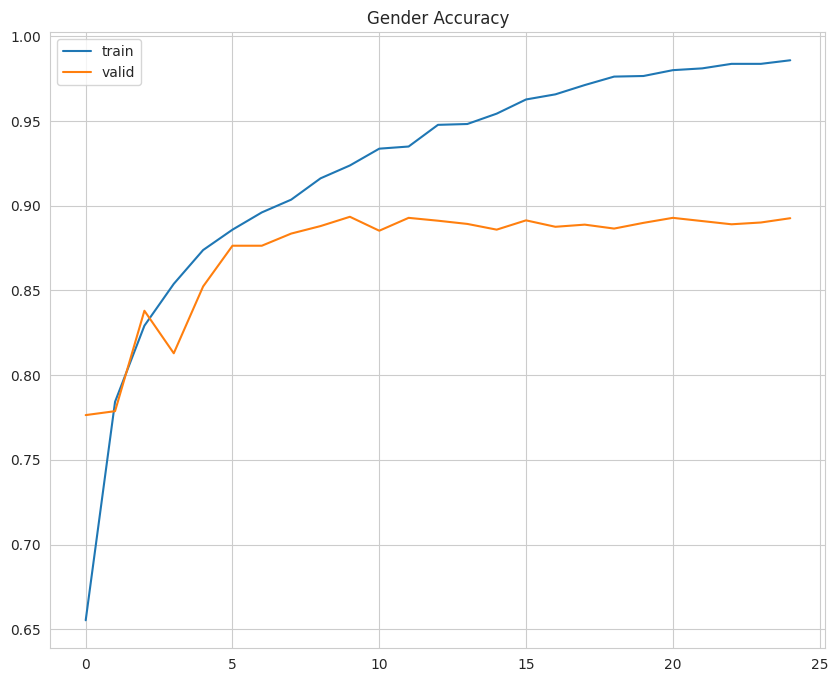

In [ ]:
plt.figure(figsize=(10, 8))

plt.title("Gender Accuracy")

plt.plot(history_df["dense_1_accuracy"])
plt.plot(history_df["val_dense_1_accuracy"])

plt.legend(["train", "valid"])

plt.show()

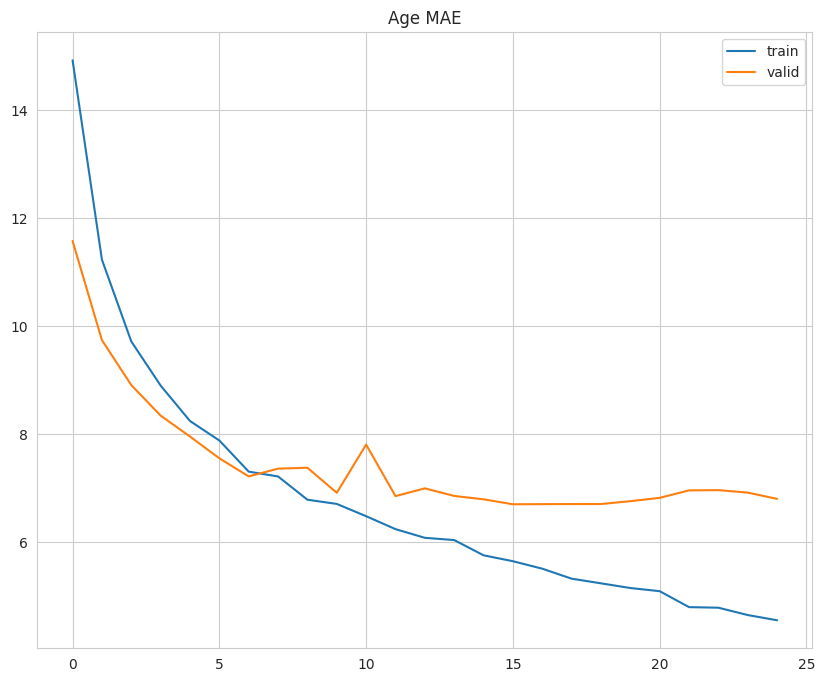

In [ ]:
plt.figure(figsize=(10, 8))

plt.title("Age MAE")

plt.plot(history_df["dense_3_mae"])
plt.plot(history_df["val_dense_3_mae"])

plt.legend(["train", "valid"])

plt.show()

In [ ]:
preds = model.predict(test_img_arr, verbose=0)
pred_gender = np.argmax(preds[0], axis=1)
pred_age = [round(pred[0]) for pred in preds[1]]

In [ ]:
df_test["pred_age"] = pred_age
df_test["pred_gender"] = pred_gender

In [ ]:
df_test.head()

,image_path,age,gender,pred_age,pred_gender
0,/content/UTKFace/27_1_3_20170119194421382.jpg....,27,1,35,0
1,/content/UTKFace/35_1_1_20170117190443525.jpg....,35,1,41,0
2,/content/UTKFace/68_1_0_20170110175345439.jpg....,68,1,70,0
3,/content/UTKFace/40_1_0_20170117181413925.jpg....,40,1,31,0
4,/content/UTKFace/26_0_2_20170116183647463.jpg....,26,0,21,0


In [ ]:
def visualize_results(df: pd.DataFrame):
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))

    for i, ax in enumerate(axes.ravel()):
        if i < len(df):
            a = np.random.randint(1, len(df), 1)[0]
            gender_dict = {0: 'Male', 1: 'Female'}
            img_path = df.loc[a][['image_path']].values[0]
            img_age = df.loc[a][['age']].values[0]
            img_gender = df.loc[a][['gender']].values[0]
            img_pred_age = df.loc[a][['pred_age']].values[0]
            img_pred_gender = df.loc[a][['pred_gender']].values[0]

            image = Image.open(img_path).convert('RGB')

            ax.imshow(image)
            ax.set_title(f"Pred Age: {img_pred_age}(True:{img_age})\nPred Gender: {gender_dict[img_pred_gender]}(True:{gender_dict[img_gender]})")
            ax.axis('off')

        else:
            ax.axis('off')
    plt.tight_layout()
    plt.show()

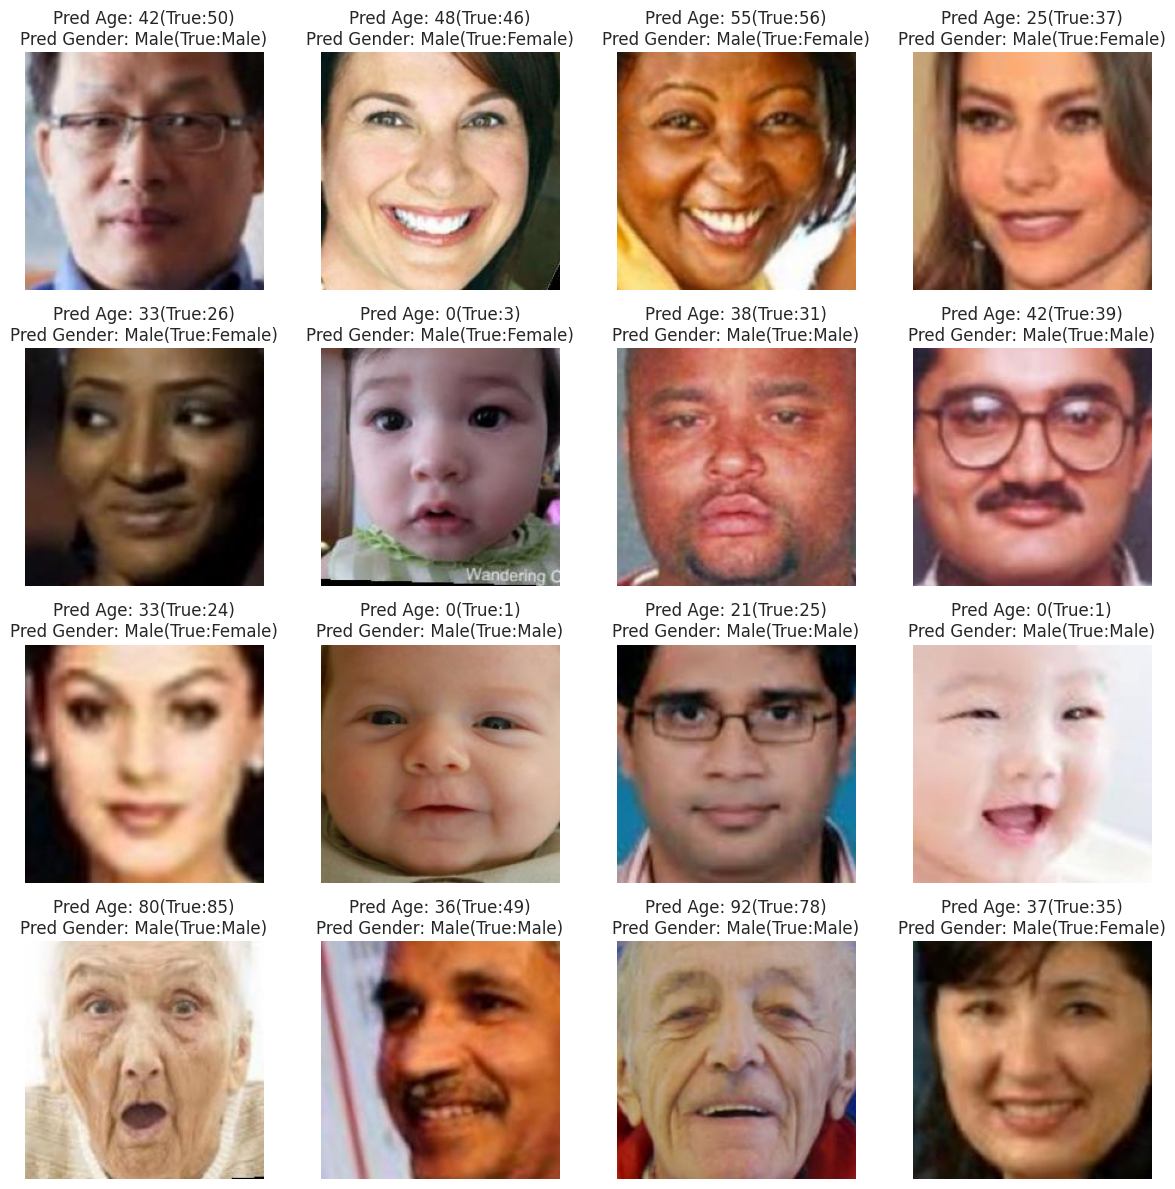

In [ ]:
visualize_results(df_test)